In [102]:

# file_path = 'test_input.txt'
file_path = 'input.txt'
with open(file_path) as file:
    lines =  [line.rstrip().split(' ') for line in file]

data = [[a[0], int(a[3]), int(a[6]), int(a[13]) ] for a in lines]

data

# ['Vixen', 'can', 'fly', '8', 'km/s', 'for', '8', 'seconds,', 'but', 'then', 'must', 'rest', 'for', '53', 'seconds.'],

[['Vixen', 8, 8, 53],
 ['Blitzen', 13, 4, 49],
 ['Rudolph', 20, 7, 132],
 ['Cupid', 12, 4, 43],
 ['Donner', 9, 5, 38],
 ['Dasher', 10, 4, 37],
 ['Comet', 3, 37, 76],
 ['Prancer', 9, 12, 97],
 ['Dancer', 37, 1, 36]]

# Part I

In [89]:

def simulate_run(horse, duration = 2503):

    run_rest = horse[2] + horse[3]
    num_blocks = duration // run_rest
    last_block_duration = duration - num_blocks * run_rest
    last_run_duration = min(horse[2], last_block_duration)
    run_time = num_blocks * horse[2] + last_run_duration
    run_dist = run_time * horse[1]

    return run_time, run_dist


simulate_run(['Booah', 5, 8, 9], 18)

(9, 45)

In [26]:




result = []
for horse in data:
    time, dist = simulate_run(horse)
    result.append(dist)
    print(horse[0],'\t\t', dist)
    
print('Max =', max(result))




Vixen 		 2640
Blitzen 		 2496
Rudolph 		 2540
Cupid 		 2592
Donner 		 2655
Dasher 		 2460
Comet 		 2493
Prancer 		 2484
Dancer 		 2516
Max = 2655


# Part II

In [90]:
data = [
    ['Comet', 14,10,127],
    ['Dancer', 16,11,162]
]

In [106]:
import numpy as np


duration = 2504
# duration = 1000
points = np.zeros(len(data))
distances = []
point_buf = []
dist_buf = []
for d in range(duration):

    dist = np.array([ simulate_run(horse, d)[1] for horse in data])
    dist_buf.append(dist)
    m = dist.max()
    if m > 0:
        points_to_be_awarded = np.array([1 if a else 0 for a in (dist == m) ])
        points = points + points_to_be_awarded
    point_buf.append(points)
    # print(dist, points_to_be_awarded, points)    



display(list(zip([a[0] for a in data], points )))

[('Vixen', 1059.0),
 ('Blitzen', 5.0),
 ('Rudolph', 887.0),
 ('Cupid', 13.0),
 ('Donner', 414.0),
 ('Dasher', 0.0),
 ('Comet', 22.0),
 ('Prancer', 153.0),
 ('Dancer', 1.0)]

[1.059e+03 5.000e+00 8.870e+02 1.300e+01 4.140e+02 0.000e+00 2.200e+01
 1.530e+02 1.000e+00]


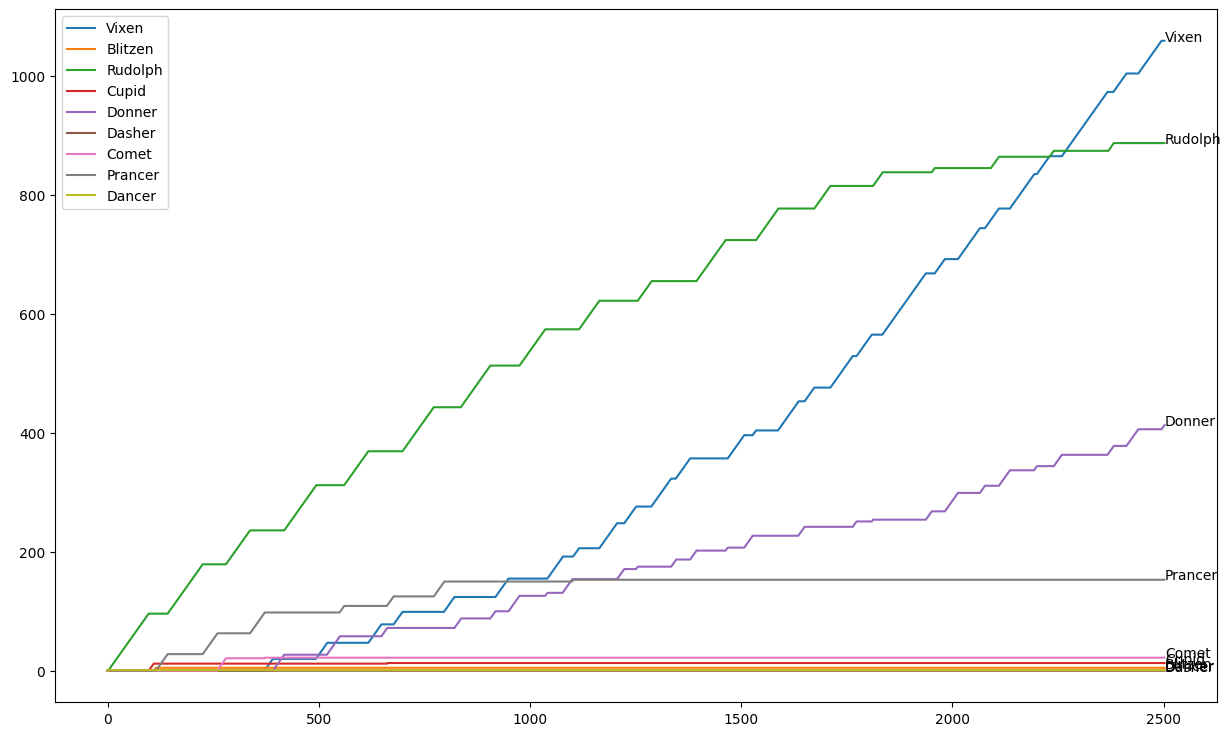

In [107]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(15,9))





show_frames = 2503
for i, horse in enumerate(point_buf[0]):


    line = [frame[i] for frame in point_buf[:show_frames]]
    ax.plot(np.arange(len(line)), line, label=data[i][0] )
    ax.text(show_frames, point_buf[:show_frames][-1][i], data[i][0] )


ax.legend()
print(point_buf[show_frames])
# [['Vixen', 8, 8, 53],
#  ['Blitzen', 13, 4, 49],
#  ['Rudolph', 20, 7, 132],
#  ['Cupid', 12, 4, 43],
#  ['Donner', 9, 5, 38],
#  ['Dasher', 10, 4, 37],
#  ['Comet', 3, 37, 76],
#  ['Prancer', 9, 12, 97],
#  ['Dancer', 37, 1, 36]]
